In [1]:
# const SAVED_DIR = "/n/regal/pillai_lab/mrischard/saved/"
# const DATA_DIR = "/n/regal/pillai_lab/mrischard/TempModel/data/"
const SAVED_DIR = "/Volumes/Samsung250GB/saved/"
const DATA_DIR = "/Users/imolk/Documents/Harvard/Natesh/TempModel/data"

"/Users/imolk/Documents/Harvard/Natesh/TempModel/data"

In [2]:
import PyPlot; plt=PyPlot
using LaTeXStrings
plt.rc("figure", dpi=150.0)
plt.rc("figure", figsize=(8,5))
plt.rc("savefig", dpi=150.0)
plt.rc("text", usetex=false)
plt.rc("font", family="serif")
plt.rc("font", serif="Palatino")
;

┌ Info: Recompiling stale cache file /Users/imolk/Library/Julia/alternative_depots/climate/compiled/v1.1/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1184


In [3]:
using DataFrames
using TempModel
using Dates
using PDMats
using LinearAlgebra
using Printf
using Statistics: mean, var, cov

┌ Info: Recompiling stale cache file /Users/imolk/Library/Julia/alternative_depots/climate/compiled/v1.1/TempModel/5V5SX.ji for TempModel [429a4ede-8e99-57b3-891e-c3971593d88c]
└ @ Base loading.jl:1184


In [4]:
ICAO = "KWRB"

epsg = 3857 # Web Mercator (m)
isdList = TempModel.read_isdList(; data_dir=DATA_DIR, epsg=epsg)
isd_wData = TempModel.stations_with_data(isdList; data_dir=DATA_DIR)
;

In [5]:
isd_wData[isd_wData[:ICAO].=="KLWT",:]

,USAF,WBAN,NAME,CTRY,STATE,ICAO,LAT,LON,ELEV,BEGIN,END,X_PRJ,Y_PRJ
,Int64⍰,Int64⍰,String⍰,String⍰,String⍰,String⍰,Float64⍰,Float64⍰,Float64⍰,Int64⍰,Int64⍰,Float64,Float64
1,726776,24036,LEWISTOWN MUNICIPAL ARPT,US,MT,KLWT,47.049,-109.458,1263.4,1942,2015,-1.21848e7,5.95008e6


In [6]:
max_gap_ICAO = Dict{String,Float64}()
for istation in 1:nrow(isd_wData)
    usaf, wban, icao = isd_wData[istation, :USAF], isd_wData[istation, :WBAN], isd_wData[istation, :ICAO]
    hourly = TempModel.read_station(usaf, wban, 42; data_dir=DATA_DIR);
    ts = hourly[:ts]
    ms_per_hour = convert(Millisecond, Hour(1))
    max_gap = maximum(diff(ts)) / ms_per_hour
    max_gap_ICAO[icao] = max_gap
end

┌ Warning: dropmissing! will change eltype of cols to disallow missing by default. Use dropmissing!(df, cols, disallowmissing=false) to retain missing.
│   caller = dropmissing!(::DataFrame) at abstractdataframe.jl:733
└ @ DataFrames /Users/imolk/Library/Julia/alternative_depots/climate/packages/DataFrames/IKMvt/src/abstractdataframe/abstractdataframe.jl:733


In [7]:
max_gap_ICAO["KWRB"]

8.766666666666667

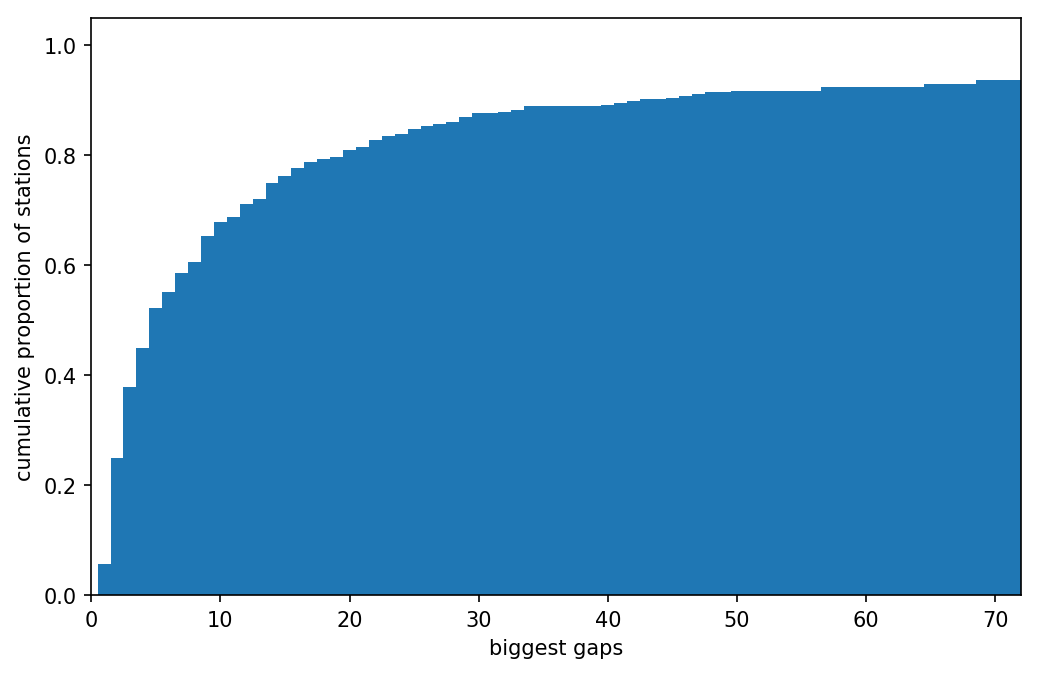

In [8]:
bins = -0.5:1:maximum(values(max_gap_ICAO))
plt.plt[:hist](collect(values(max_gap_ICAO)), bins, cumulative=true, normed=true)
plt.xlim(0,72)
plt.xlabel("biggest gaps")
plt.ylabel("cumulative proportion of stations")
;

In [9]:
using Printf
test_ICAOs=["KWRB", "KMXF", "KJAN", "KESF", "KSJT", "KPHX", "KPOB", "KCAE", "KBNA", "KLRF", "KTIK", "KABQ", "KFAT",
            "KDCA", "KBWI", "KDOV", "KWRI", "KLYH", "KEKN", "KFTK", "KCMH", "KIND", "KSPI", "KCOU", "KICT", "KHVE",
            "KTPH", "KPVD", "KBDL", "KAOO", "KSYR", "KDSM", "KLBF", "KCPR", "KCON", "KMPV", "KMLT", "KMKG", "KVOK",
            "KHON", "KAXN", "KLWT", "KMUO", "KBNO", "KBIS", "KYKM", "KCEF", "KAFF"]
for icao in test_ICAOs
    @printf("%s: %.1f days\n", icao, max_gap_ICAO[icao]/24)
end

KWRB: 0.4 days
KMXF: 1.2 days
KJAN: 0.1 days
KESF: 0.3 days
KSJT: 0.3 days
KPHX: 0.2 days
KPOB: 0.3 days
KCAE: 0.1 days
KBNA: 0.1 days
KLRF: 0.9 days
KTIK: 0.5 days
KABQ: 0.1 days
KFAT: 0.1 days
KDCA: 0.1 days
KBWI: 0.1 days
KDOV: 0.9 days
KWRI: 0.6 days
KLYH: 0.4 days
KEKN: 1.0 days
KFTK: 0.4 days
KCMH: 0.0 days
KIND: 0.1 days
KSPI: 0.1 days
KCOU: 0.7 days
KICT: 0.1 days
KHVE: 0.7 days
KTPH: 0.1 days
KPVD: 0.1 days
KBDL: 0.1 days
KAOO: 0.2 days
KSYR: 0.1 days
KDSM: 0.1 days
KLBF: 0.2 days
KCPR: 0.2 days
KCON: 2.7 days
KMPV: 0.1 days
KMLT: 0.2 days
KMKG: 0.3 days
KVOK: 3.9 days
KHON: 1.9 days
KAXN: 1.0 days
KLWT: 5.5 days
KMUO: 0.4 days
KBNO: 0.4 days
KBIS: 0.1 days
KYKM: 0.3 days
KCEF: 0.1 days
KAFF: 0.4 days


# Stations map

In [10]:
include("../src/plot_map.jl")

LoadError: PyError (PyImport_ImportModule

The Python package mpl_toolkits.basemap could not be found by pyimport. Usually this means
that you did not install mpl_toolkits.basemap in the Python version being used by PyCall.

PyCall is currently configured to use the Python version at:

/Users/imolk/bin/venv_python3/bin/python

and you should use whatever mechanism you usually use (apt-get, pip, conda,
etcetera) to install the Python package containing the mpl_toolkits.basemap module.

One alternative is to re-configure PyCall to use a different Python
version on your system: set ENV["PYTHON"] to the path/name of the python
executable you want to use, run Pkg.build("PyCall"), and re-launch Julia.

Another alternative is to configure PyCall to use a Julia-specific Python
distribution via the Conda.jl package (which installs a private Anaconda
Python distribution), which has the advantage that packages can be installed
and kept up-to-date via Julia.  As explained in the PyCall documentation,
set ENV["PYTHON"]="", run Pkg.build("PyCall"), and re-launch Julia. Then,
To install the mpl_toolkits.basemap module, you can use `pyimport_conda("mpl_toolkits.basemap", PKG)`,
where PKG is the Anaconda package the contains the module mpl_toolkits.basemap,
or alternatively you can use the Conda package directly (via
`using Conda` followed by `Conda.add` etcetera).

) <class 'ImportError'>
ImportError("cannot import name 'is_scalar' from 'matplotlib.cbook' (/Users/imolk/bin/venv_python3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py)")
  File "/Users/imolk/bin/venv_python3/lib/python3.7/site-packages/mpl_toolkits/basemap/__init__.py", line 17, in <module>
    from matplotlib.cbook import is_scalar, dedent


In [11]:
plot_map(isd_wData, epsg; arcgis=false, resolution="l")

UndefVarError: UndefVarError: plot_map not defined

In [12]:
plot_map(isd_wData[smallgaps,:], epsg; arcgis=false, resolution="l")

UndefVarError: UndefVarError: smallgaps not defined

# A look at the raw data

In [62]:
using Libz
function parse_ISD(gz_filepath)
    dt_vec = DateTime[]
    temp_vec = Union{Missing,Float64}[]
    temp_qc_vec = Union{Char}[]
    # read lines from a compressed file
    open(gz_filepath, "r") do file
        for line in eachline(ZlibInflateInputStream(file))
            line::String
            usaf = line[5:10]
            wban = line[11:15]
            # datetime stamp
            dt_gmt = DateTime(line[16:27], "yyyymmddHHMMSS")
            
            # temperature
            temp_str = line[88:92]
            temp = temp_str == "+9999" ? missing : parse(Float64, temp_str)
            temp_qc = line[93]
            
            # push to vectors
            push!(dt_vec, dt_gmt)
            push!(temp_vec, temp)
            push!(temp_qc_vec, temp_qc)
        end
    end
    return DataFrame(ts=dt_vec, temp=temp_vec, qc=categorical(temp_qc_vec))
end

parse_ISD (generic function with 1 method)

In [63]:
gz_filepath = "/Users/imolk/Downloads/726776-24036-2015.gz"
parse_ISD(gz_filepath)
@time df_726776 = parse_ISD(gz_filepath);

  0.459508 seconds (1.37 M allocations: 79.056 MiB, 8.13% gc time)


```
0 = Passed gross limits check
1 = Passed all quality control checks
2 = Suspect
3 = Erroneous
4 = Passed gross limits check , data originate from an NCEI data source
5 = Passed all quality control checks, data originate from an NCEI data source
6 = Suspect, data originate from an NCEI data source
7 = Erroneous, data originate from an NCEI data source
9 = Passed gross limits check if element is present
A = Data value flagged as suspect, but accepted as a good value
C = Temperature and dew point received from Automated Weather Observing System (AWOS) are reported in whole degrees Celsius. Automated QC flags these values, but they are accepted as valid.
I = Data value not originally in data, but inserted by validator
M = Manual changes made to value based on information provided by NWS or FAA
P = Data value not originally flagged as suspect, but replaced by validator
R = Data value replaced with value computed by NCEI software
U = Data value replaced with edited value
```

In [68]:
nrow(df_726776)

11727

In [67]:
count(qc -> qc=='5', df_726776[:qc])

11008

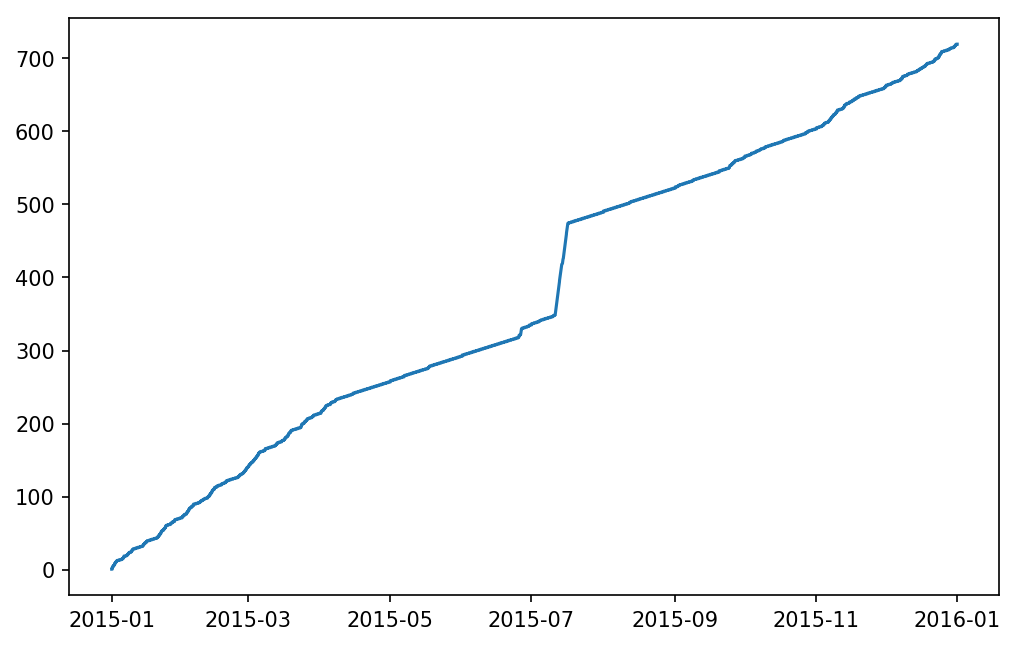

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x133747c88>

In [77]:
plt.plot(df_726776[:ts], cumsum(df_726776[:qc].!='5'))

In [79]:
print(df_726776[df_726776[:qc] .!= '5', :])

719×3 DataFrame
│ Row │ ts                  │ temp     │ qc           │
│     │ DateTime            │ Float64⍰ │ Categorical… │
├─────┼─────────────────────┼──────────┼──────────────┤
│ 1   │ 2015-01-01T00:00:00 │ missing  │ '9'          │
│ 2   │ 2015-01-01T06:00:00 │ missing  │ '9'          │
│ 3   │ 2015-01-01T06:59:00 │ missing  │ '9'          │
│ 4   │ 2015-01-01T06:59:00 │ missing  │ '9'          │
│ 5   │ 2015-01-01T12:00:00 │ missing  │ '9'          │
│ 6   │ 2015-01-01T18:00:00 │ missing  │ '9'          │
│ 7   │ 2015-01-02T00:00:00 │ missing  │ '9'          │
│ 8   │ 2015-01-02T06:00:00 │ missing  │ '9'          │
│ 9   │ 2015-01-02T06:59:00 │ missing  │ '9'          │
│ 10  │ 2015-01-02T12:00:00 │ missing  │ '9'          │
│ 11  │ 2015-01-02T18:00:00 │ missing  │ '9'          │
│ 12  │ 2015-01-03T00:00:00 │ missing  │ '9'          │
│ 13  │ 2015-01-03T06:59:00 │ missing  │ '9'          │
│ 14  │ 2015-01-04T06:59:00 │ missing  │ '9'          │
│ 15  │ 2015-01-05T06:59:00 │ mi

│ 212 │ 2015-03-29T06:59:00 │ missing  │ '9'          │
│ 213 │ 2015-03-30T06:59:00 │ missing  │ '9'          │
│ 214 │ 2015-03-31T06:59:00 │ missing  │ '9'          │
│ 215 │ 2015-04-01T06:59:00 │ missing  │ '9'          │
│ 216 │ 2015-04-01T06:59:00 │ missing  │ '9'          │
│ 217 │ 2015-04-01T12:00:00 │ missing  │ '9'          │
│ 218 │ 2015-04-01T18:00:00 │ missing  │ '9'          │
│ 219 │ 2015-04-02T06:59:00 │ missing  │ '9'          │
│ 220 │ 2015-04-02T12:00:00 │ missing  │ '9'          │
│ 221 │ 2015-04-02T18:00:00 │ missing  │ '9'          │
│ 222 │ 2015-04-03T00:00:00 │ missing  │ '9'          │
│ 223 │ 2015-04-03T06:00:00 │ missing  │ '9'          │
│ 224 │ 2015-04-03T06:59:00 │ missing  │ '9'          │
│ 225 │ 2015-04-03T18:00:00 │ missing  │ '9'          │
│ 226 │ 2015-04-04T06:59:00 │ missing  │ '9'          │
│ 227 │ 2015-04-05T06:59:00 │ missing  │ '9'          │
│ 228 │ 2015-04-05T12:00:00 │ missing  │ '9'          │
│ 229 │ 2015-04-05T18:00:00 │ missing  │ '9'    

│ 347 │ 2015-07-10T06:59:00 │ missing  │ '9'          │
│ 348 │ 2015-07-10T17:54:00 │ 311.0    │ '6'          │
│ 349 │ 2015-07-11T06:59:00 │ missing  │ '9'          │
│ 350 │ 2015-07-11T11:54:00 │ missing  │ '9'          │
│ 351 │ 2015-07-11T12:54:00 │ missing  │ '9'          │
│ 352 │ 2015-07-11T13:54:00 │ missing  │ '9'          │
│ 353 │ 2015-07-11T14:54:00 │ missing  │ '9'          │
│ 354 │ 2015-07-11T15:54:00 │ missing  │ '9'          │
│ 355 │ 2015-07-11T16:54:00 │ missing  │ '9'          │
│ 356 │ 2015-07-11T17:54:00 │ missing  │ '9'          │
│ 357 │ 2015-07-11T18:54:00 │ missing  │ '9'          │
│ 358 │ 2015-07-11T19:54:00 │ missing  │ '9'          │
│ 359 │ 2015-07-11T20:54:00 │ missing  │ '9'          │
│ 360 │ 2015-07-11T21:54:00 │ missing  │ '9'          │
│ 361 │ 2015-07-11T22:54:00 │ missing  │ '9'          │
│ 362 │ 2015-07-11T23:54:00 │ missing  │ '9'          │
│ 363 │ 2015-07-12T00:54:00 │ missing  │ '9'          │
│ 364 │ 2015-07-12T01:54:00 │ missing  │ '9'    

│ 487 │ 2015-07-29T06:59:00 │ missing  │ '9'          │
│ 488 │ 2015-07-30T06:59:00 │ missing  │ '9'          │
│ 489 │ 2015-07-31T06:59:00 │ missing  │ '9'          │
│ 490 │ 2015-08-01T06:59:00 │ missing  │ '9'          │
│ 491 │ 2015-08-01T06:59:00 │ missing  │ '9'          │
│ 492 │ 2015-08-02T06:59:00 │ missing  │ '9'          │
│ 493 │ 2015-08-03T06:59:00 │ missing  │ '9'          │
│ 494 │ 2015-08-04T06:59:00 │ missing  │ '9'          │
│ 495 │ 2015-08-05T06:59:00 │ missing  │ '9'          │
│ 496 │ 2015-08-06T06:59:00 │ missing  │ '9'          │
│ 497 │ 2015-08-07T06:59:00 │ missing  │ '9'          │
│ 498 │ 2015-08-08T06:59:00 │ missing  │ '9'          │
│ 499 │ 2015-08-09T06:59:00 │ missing  │ '9'          │
│ 500 │ 2015-08-10T06:59:00 │ missing  │ '9'          │
│ 501 │ 2015-08-11T06:59:00 │ missing  │ '9'          │
│ 502 │ 2015-08-12T06:59:00 │ missing  │ '9'          │
│ 503 │ 2015-08-12T16:54:00 │ 333.0    │ '6'          │
│ 504 │ 2015-08-13T06:59:00 │ missing  │ '9'    

│ 621 │ 2015-11-08T06:59:00 │ missing  │ '9'          │
│ 622 │ 2015-11-08T12:00:00 │ missing  │ '9'          │
│ 623 │ 2015-11-08T18:00:00 │ missing  │ '9'          │
│ 624 │ 2015-11-09T06:59:00 │ missing  │ '9'          │
│ 625 │ 2015-11-09T12:00:00 │ missing  │ '9'          │
│ 626 │ 2015-11-09T18:00:00 │ missing  │ '9'          │
│ 627 │ 2015-11-10T00:00:00 │ missing  │ '9'          │
│ 628 │ 2015-11-10T06:00:00 │ missing  │ '9'          │
│ 629 │ 2015-11-10T06:59:00 │ missing  │ '9'          │
│ 630 │ 2015-11-11T06:59:00 │ missing  │ '9'          │
│ 631 │ 2015-11-12T06:59:00 │ missing  │ '9'          │
│ 632 │ 2015-11-12T18:00:00 │ missing  │ '9'          │
│ 633 │ 2015-11-13T00:00:00 │ missing  │ '9'          │
│ 634 │ 2015-11-13T06:00:00 │ missing  │ '9'          │
│ 635 │ 2015-11-13T06:59:00 │ missing  │ '9'          │
│ 636 │ 2015-11-13T12:00:00 │ missing  │ '9'          │
│ 637 │ 2015-11-14T00:00:00 │ missing  │ '9'          │
│ 638 │ 2015-11-14T06:59:00 │ missing  │ '9'    

In [71]:
df_qc5 = df_726776[df_726776[:qc] .== '5', :]
;

In [72]:
maximum(diff(df_726776[:ts])) / convert(Millisecond, Hour(1))

6.916666666666667

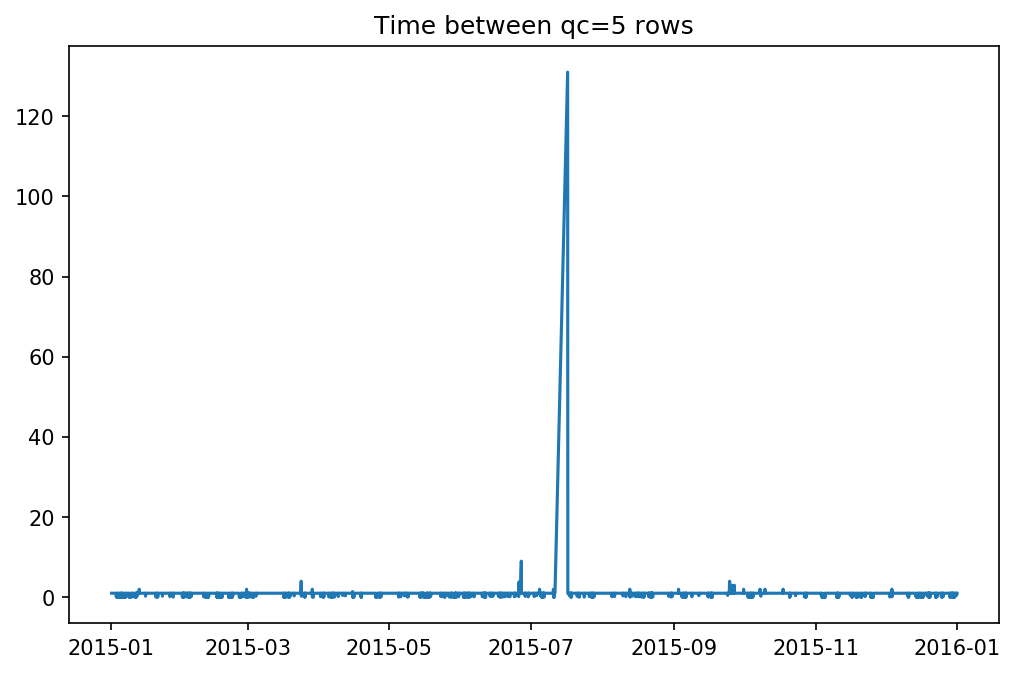

In [84]:
plt.plot(df_qc5[2:end,:ts], diff(df_qc5[:ts]) ./  convert(Millisecond, Hour(1)))
plt.title("Time between qc=5 rows")
;

In [88]:
print(df_726776[DateTime(2015,7,11,0,0,0) .<= df_726776[:ts] .<= DateTime(2015,7,18,0,0,0),:])

171×3 DataFrame
│ Row │ ts                  │ temp     │ qc           │
│     │ DateTime            │ Float64⍰ │ Categorical… │
├─────┼─────────────────────┼──────────┼──────────────┤
│ 1   │ 2015-07-11T00:21:00 │ 206.0    │ '5'          │
│ 2   │ 2015-07-11T00:40:00 │ 183.0    │ '5'          │
│ 3   │ 2015-07-11T00:52:00 │ 180.0    │ '5'          │
│ 4   │ 2015-07-11T00:54:00 │ 183.0    │ '5'          │
│ 5   │ 2015-07-11T01:13:00 │ 178.0    │ '5'          │
│ 6   │ 2015-07-11T01:28:00 │ 183.0    │ '5'          │
│ 7   │ 2015-07-11T01:54:00 │ 178.0    │ '5'          │
│ 8   │ 2015-07-11T02:54:00 │ 172.0    │ '5'          │
│ 9   │ 2015-07-11T03:54:00 │ 167.0    │ '5'          │
│ 10  │ 2015-07-11T04:54:00 │ 161.0    │ '5'          │
│ 11  │ 2015-07-11T05:54:00 │ 156.0    │ '5'          │
│ 12  │ 2015-07-11T06:54:00 │ 156.0    │ '5'          │
│ 13  │ 2015-07-11T06:59:00 │ missing  │ '9'          │
│ 14  │ 2015-07-11T07:54:00 │ 156.0    │ '5'          │
│ 15  │ 2015-07-11T08:54:00 │ 16

│ 133 │ 2015-07-16T11:54:00 │ missing  │ '9'          │
│ 134 │ 2015-07-16T12:54:00 │ missing  │ '9'          │
│ 135 │ 2015-07-16T13:54:00 │ missing  │ '9'          │
│ 136 │ 2015-07-16T14:54:00 │ missing  │ '9'          │
│ 137 │ 2015-07-16T15:54:00 │ missing  │ '9'          │
│ 138 │ 2015-07-16T16:54:00 │ missing  │ '9'          │
│ 139 │ 2015-07-16T17:54:00 │ missing  │ '9'          │
│ 140 │ 2015-07-16T18:54:00 │ missing  │ '9'          │
│ 141 │ 2015-07-16T19:54:00 │ missing  │ '9'          │
│ 142 │ 2015-07-16T20:54:00 │ missing  │ '9'          │
│ 143 │ 2015-07-16T21:54:00 │ 217.0    │ '5'          │
│ 144 │ 2015-07-16T22:54:00 │ 217.0    │ '5'          │
│ 145 │ 2015-07-16T23:54:00 │ 211.0    │ '5'          │
│ 146 │ 2015-07-17T00:54:00 │ 167.0    │ '5'          │
│ 147 │ 2015-07-17T01:54:00 │ 161.0    │ '5'          │
│ 148 │ 2015-07-17T02:54:00 │ 139.0    │ '5'          │
│ 149 │ 2015-07-17T03:54:00 │ 122.0    │ '5'          │
│ 150 │ 2015-07-17T04:54:00 │ 117.0    │ '5'    

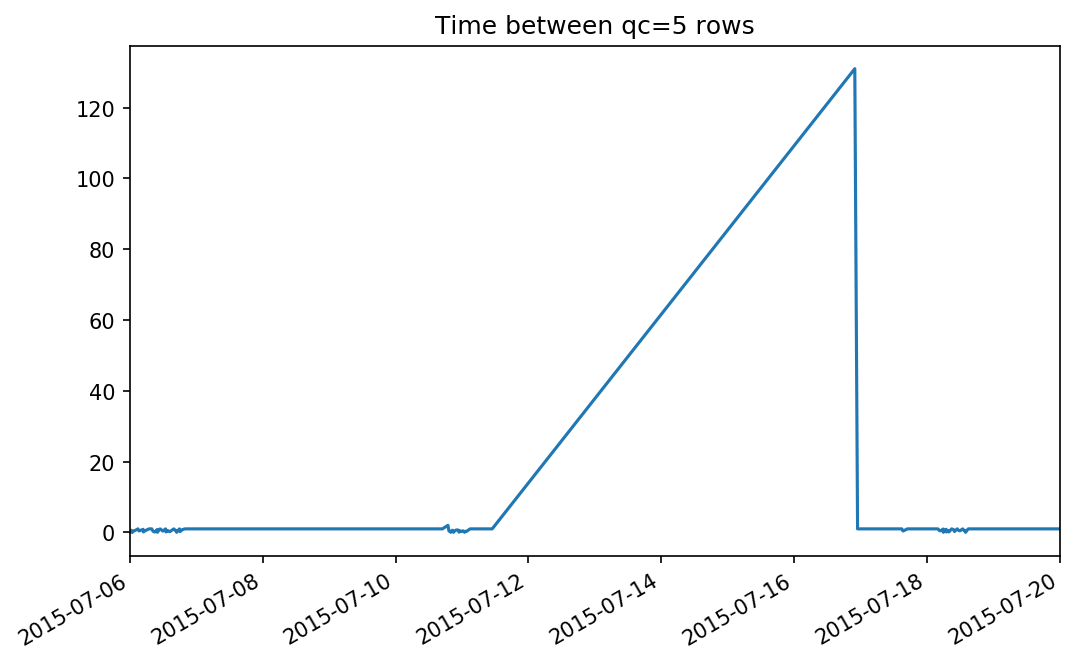

In [86]:
plt.plot(df_qc5[2:end,:ts], diff(df_qc5[:ts]) ./  convert(Millisecond, Hour(1)))
plt.title("Time between qc=5 rows")
plt.xlim(DateTime(2015,7,6,0,0,0), DateTime(2015,7,20,0,0,0))
plt.gcf()[:autofmt_xdate]()
;

In [73]:
maximum(diff(df_qc5[:ts])) / convert(Millisecond, Hour(1))

131.0